In [1]:
import alignment
import numpy as np

image_filenames = {}
for camidx in [1,2,3,4]:
    image_filenames['cam%d' % camidx] = alignment.grab_photos_in_timerange('/home/mike/Documents/Research/bee/photos2021/20thJuly/system00%d' % camidx,'13:58:00','13:58:59')
    
a = alignment.Align('/home/mike/Documents/Research/bee/photos2021/20thJuly/config000000.json',image_filenames)    

a.optimise_positions()

a.found = {}
a.load_photos_for_alignment(True)
a.find_markers()

fov, ret = a.estimate_fov()
#a.fov = 0.88 #2*np.arctan(np.sqrt(14.11**2 / (1+0.75**2)) / (2*8)) #computed from sensor=1/1.8"=14.11mm, and lens = 8mm focal length.
for cam in ret: print(ret[cam]['x'])
    
a.build_newitems()
from copy import deepcopy
#Adding nest coords
nest = {}
nest['cam1'] = {'frontleft':[1768.0,1292.0],'frontright':[1819.0,1293.0]}
nest['cam2'] = {'frontleft':[1242.0, 947.0],'frontright':[1303.0, 960.0]}
nest['cam3'] = {'frontleft':[1145.0, 1090.0],'frontright':[1166.0,1085.0]}
nest['cam4'] = {'frontleft':[1018.0,1234.0], 'frontright':[1072.0,1235.0]}
a.newitems['nestfrontleft'] = {}
a.newitems['nestfrontleft']['coords'] = deepcopy(a.newitems['nest']['coords'])
a.newitems['nestfrontleft']['imgcoords'] = {}
a.newitems['nestfrontleft']['bounds'] = 5.0
a.newitems['nestfrontleft']['weight'] = 5.0 #how much more weight to give the accuracy of this one
a.newitems['nestfrontright'] = {}
a.newitems['nestfrontright']['coords'] = deepcopy(a.newitems['nest']['coords'])
a.newitems['nestfrontright']['imgcoords'] = {}
a.newitems['nestfrontright']['bounds'] = 5.0
a.newitems['nestfrontright']['weight'] = 5.0 #how much more weight to give the accuracy of this one

for cam in [1,2,3,4]:
    a.newitems['nestfrontleft']['imgcoords']['cam%d' % cam] = nest['cam%d' % cam]['frontleft']
    a.newitems['nestfrontright']['imgcoords']['cam%d' % cam] = nest['cam%d' % cam]['frontright']
#a.newitems


#opt = a.generate_alignment(100)

Trying to load from cache (found_cache_66561397095.pkl)
Trying to load from cache (found_cache_84074176655.pkl)
Trying to load from cache (found_cache_91753345513.pkl)
Trying to load from cache (found_cache_100149902893.pkl)
[-0.44076039  0.83529081]
[0.38872383 0.88201261]
[-1.33727419  0.7694481 ]
[-0.36283922  0.82717938]


In [2]:
opt = a.generate_alignment(100)

531655143.8960526
385913556.1635624
197173656.2070656
114841381.50212856
64651782.895763114
37565378.52911253
20852453.807331696
10316157.285594754
2582548.4650137853
1449924.3917192626
1260375.0316376449
1208438.5779066873
1118947.1006357975
922004.3906731798
596448.8700176354
391902.57275083003
320998.7934454708
306841.8542844884
296316.8945235153
258751.4245471728
233222.27921786223
190651.92762156593
181592.83834461233
178840.17411436804
175004.84220991938
163923.0334420158
149922.14478618957
128080.90686527778
98233.18700576543
88978.40710786248
84466.03409849395
67282.77672947955
64126.15996051573
62169.1619329358
61748.23484881389
61112.95888117038
59774.02173371567
57025.604576777
51872.50228750049
47552.99543914127
40452.43641568206
35136.641402402354
32380.947209301616
31760.607209496346
30154.07928220943
29491.220173561298
28487.80055064138
26896.62572259723
25627.797709620703
23627.00817789015
21472.613095497698
20326.07861424061
19028.595571431135
18721.60594528142
18037.7

In [7]:
opt['x'][0]

0.8231953410898354

0.16952565615296844


<IPython.core.display.Javascript object>


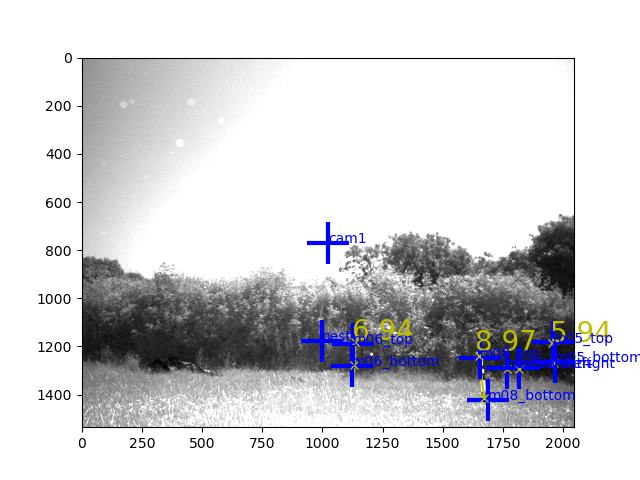

-0.025526246735559154


<IPython.core.display.Javascript object>


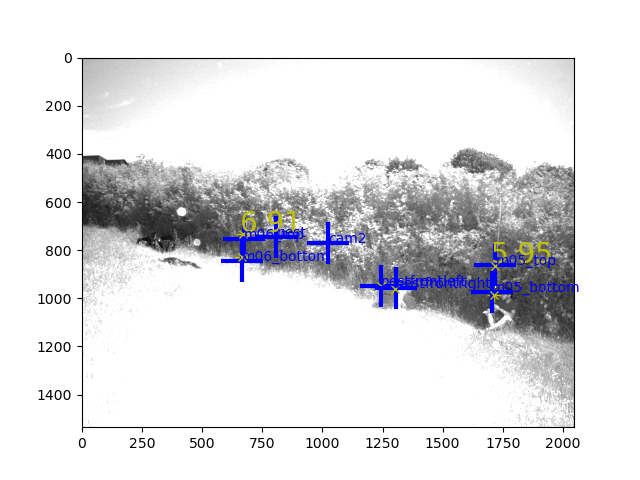

0.07540533234018654


<IPython.core.display.Javascript object>


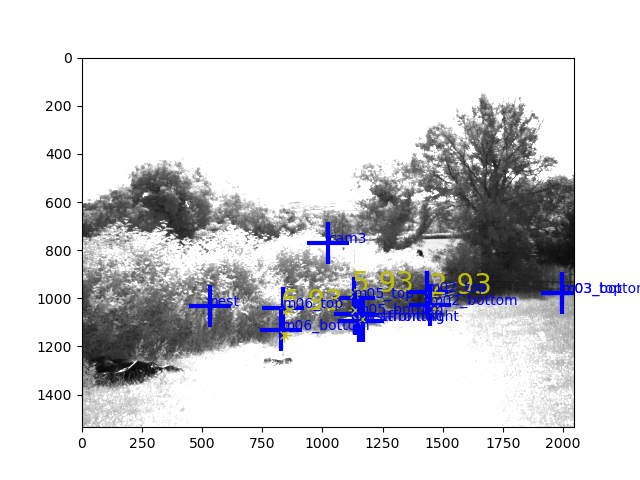

0.10523377956257612


<IPython.core.display.Javascript object>


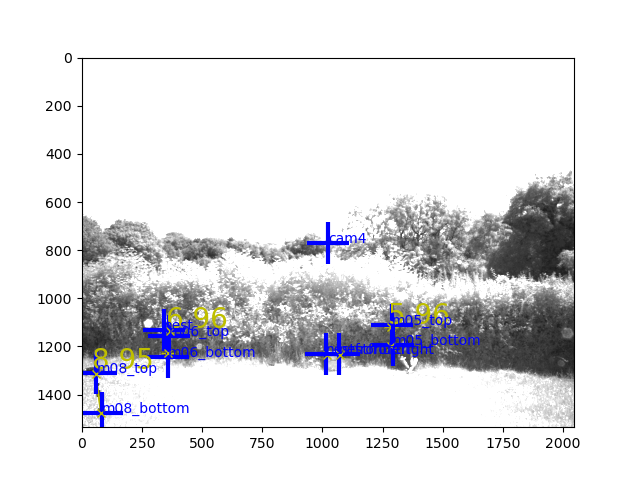

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
for cam in a.cam_photos:
    print(a.newitems[cam]['pitch'])
    plt.figure()
    a.draw_found(a.cam_photos[cam],a.found[cam],15)
    for it in a.newitems:
        imgxy = a.get_pixel_loc(a.newitems[cam],a.newitems[it])
        #origincheckxyz, vectcheckxyz = a.get_vector_pixel(a.newitems[cam],imgxy)
        #checkxy = a.get_pixel_loc(a.newitems[cam],{'coords':origincheckxyz+vectcheckxyz})
        if (imgxy[0]>0) and (imgxy[0]<2048) and (imgxy[1]>0) and (imgxy[1]<2048*0.75):
            #print(cam,it,imgxy,":",a.newitems[it]['coords'],checkxyz)
            plt.plot(imgxy[0],imgxy[1],'b+',markersize=30,mew=3)
            #plt.plot(checkxy[0],checkxy[1],'yx',markersize=30,mew=3)
            plt.text(imgxy[0],imgxy[1],it,color='b')
            if 'imgcoords' in a.newitems[it]:
                if (cam in a.newitems[it]['imgcoords']):
                    knownxy = a.newitems[it]['imgcoords'][cam]
                    plt.plot(knownxy[0],knownxy[1],'yx')
    

In [5]:
#import matplotlib.pyplot as plt
#%matplotlib notebook
#for i in [1,2,3,4]:
#    plt.figure()
#    a.draw_found(a.cam_photos['cam%d' % i],a.found['cam%d' % i],imthresh=20)

In [ ]:
import retrodetect

coords = {}
for cam in [1,2,3,4]:
    coords['cam%d' % cam] = []
    photo_list = []
    print(cam)
    for fn in image_filenames['cam%d' % cam]:
        try:
            photoitem = np.load(fn,allow_pickle=True)
        except OSError:
            continue #skip this one if we can't access it
        if photoitem is not None:
            if photoitem['img'] is not None:
                photoitem['img'] = photoitem['img'].astype(float)
                print(".",end="")
            else:
                print("o",end="")
        else:
            print("o",end="")
        photo_list.append(photoitem)
        if len(photo_list)>20:
            photo_list.pop(0)
            print("x",end="")
        contact, found, _ = retrodetect.detectcontact(photo_list,len(photo_list)-1,Npatches=20)
        if contact is not None:
            for con in contact:
                if con['prediction']<8:
                    coords['cam%d' % cam].append({'triggertime':photo_list[-1]['record']['triggertime'], 'xy':[con['x'],con['y']], 'score':con['prediction']})
                    #plt.plot(con['x'],con['y'],'o',mew=3,markersize=50,alpha=0.3)        

In [9]:
import pickle
coords = pickle.load(open('coords_cache2.pkl','rb'))
#pickle.dump(coords,open('coords_cache2.pkl','wb'))

In [10]:
coords

{'cam1': [{'triggertime': 1626785899.4369307,
   'xy': [512, 957],
   'score': 6.036536572599632},
  {'triggertime': 1626785900.151307,
   'xy': [1796, 1271],
   'score': -1.5291175209775756},
  {'triggertime': 1626785900.151307,
   'xy': [1220, 1189],
   'score': 5.151775169670051},
  {'triggertime': 1626785900.879167,
   'xy': [1794, 1264],
   'score': -1.12161247422934},
  {'triggertime': 1626785900.879167,
   'xy': [1208, 1105],
   'score': 3.895927272927862},
  {'triggertime': 1626785900.879167,
   'xy': [1331, 606],
   'score': 2.390878827961124},
  {'triggertime': 1626785900.879167,
   'xy': [1332, 277],
   'score': 6.69769853988604},
  {'triggertime': 1626785901.6165497,
   'xy': [1106, 604],
   'score': 1.2447832412745878},
  {'triggertime': 1626785901.6165497,
   'xy': [1164, 664],
   'score': 6.505920259017289},
  {'triggertime': 1626785901.6165497,
   'xy': [552, 1414],
   'score': 6.702357228732248},
  {'triggertime': 1626785901.9817028,
   'xy': [1829, 1237],
   'score': 

In [11]:
grouped_coords = {}
for cam in [1,2,3,4]: 
    for j,c in enumerate(coords['cam%d' % cam]):
        if c['triggertime'] not in grouped_coords: grouped_coords[c['triggertime']] = []
        coord = c['xy']
        origin, vect = a.get_vector_pixel(a.newitems['cam%d' % cam],coord)  
        grouped_coords[c['triggertime']].append({'origin':origin,'vect':vect,'score':c['score']})
#coords_array = np.array(coords_array)

In [12]:
filter_u = []
filter_y = []
filter_t = []
lasttrigtime = np.nan
for trigtime in sorted(grouped_coords.keys()):
    if np.isnan(lasttrigtime): lasttrigtime = trigtime
    filter_u.append(trigtime-lasttrigtime)
    filter_y.append(grouped_coords[trigtime])
    filter_t.append(trigtime)
    lasttrigtime = trigtime
filter_u = np.array(filter_u)
filter_t = np.array(filter_t)

In [21]:
type(filter_y)

list

In [11]:
import numpy as np
import ipyvolume as ipv
ipv.clear()

cols = {1:'red',2:'blue',3:'green',4:'black'}
for cam in [1,2,3,4]:
    
        origin, vect = a.get_vector_pixel(a.newitems['cam%d' % cam],nest['cam%d' % cam]['frontleft'])        
        s = origin# + vect*20
        e = origin+vect*30
        lines = np.c_[s,e]
        ipv.plot(lines[0,:],lines[1,:],lines[2,:],color=cols[cam])
        
cols = {1:'red',2:'blue',3:'green',4:'black'}
for cam in [1,2,3,4]:
    
        origin, vect = a.get_vector_pixel(a.newitems['cam%d' % cam],nest['cam%d' % cam]['frontright'])        
        s = origin# + vect*20
        e = origin+vect*30
        lines = np.c_[s,e]
        ipv.plot(lines[0,:],lines[1,:],lines[2,:],color=cols[cam])
        
grid = []
for xs in np.arange(0,25.01,5):
    for ys in np.arange(0,25.01,5):
        for zs in np.arange(0,1,10):
            grid.append([xs,ys,zs])
grid = np.array(grid)            
ipv.scatter(grid[:,0],grid[:,1],grid[:,2],size=2,marker='sphere')

grid = []
for xs in np.arange(0,25.01,1):
    for ys in np.arange(0,25.01,1):
        for zs in np.arange(0,2.01,10):
            grid.append([xs,ys,zs])
grid = np.array(grid)            
ipv.scatter(grid[:,0],grid[:,1],grid[:,2],size=1,marker='sphere')

ipv.xlim(13,15)
ipv.ylim(2,4)
ipv.zlim(0,2)

ipv.show()

In [12]:
from scipy import stats
import ipyvolume as ipv
import pyparticleest.utils.kalman as kalman
import pyparticleest.interfaces as interfaces
import pyparticleest.simulator as simulator

def get_distance(origin,vect,points):
    """
    Get distances of points from a line (defined by origin and vect)
    [thanks to help from https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points]
    """
    return np.linalg.norm(np.cross(vect, points-origin),axis=1)/np.linalg.norm(vect)

class Model(interfaces.ParticleFiltering):
    """ ... """

    def __init__(self, initcentre, initsize):
        self.initcentre = initcentre
        self.initsize = initsize
        pass
    
    def create_initial_estimate(self, N):        
        particles = np.zeros([N,6])
        particles[:,:3] = self.initcentre-self.initsize/2 + np.random.rand(N,3)*self.initsize
        particles[:,3:] = np.random.rand(N,3)*0.1 # initialise with slow speed
        return particles

    def sample_process_noise(self, particles, u, t):
        """ Return process noise for input u """
        N = len(particles)
        addednoise = np.zeros([N,6])
        addednoise[:,3:] = np.random.randn(N,3)*u
        return addednoise #this is what we add to the particles, current assuming they can accelerate anywhere 1m/s^2

    def update(self, particles, u, t, noise):
        """ Update estimate using 'data' as input """
        #print(u,t)
        particles[:,:3]+=particles[:,3:]*u
        particles += noise

    def measure(self, particles, y, t):
        """ Return the log-pdf value of the measurement """
        logyprob = np.zeros(len(particles), dtype=float)
        #print(y)
        sum_p = np.zeros(len(particles))
        for item in y:
            p = (item['score']+3)/10
            if p<0: p=0
            if p>1: p=1
            d = get_distance(item['origin'],item['vect'],particles[:,:3])
            sum_p += stats.norm(0,0.3).pdf(d)
        sum_p+=0.1
        logyprob = np.log(sum_p)
        #for k in range(len(particles)):
        #    logyprob[k] = kalman.lognormpdf(particles[k].reshape(-1, 1) - y, self.R)
        return logyprob
    
    def logp_xnext_full(self, part, past_trajs, pind,
                        future_trajs, find, ut, yt, tt, cur_ind):
        print(ut,yt)
        diff = future_trajs[0].pa.part[find] - part
    
        logpxnext = numpy.empty(len(diff), dtype=float)
        for k in range(len(logpxnext)):
            logpxnext[k] = kalman.lognormpdf(diff[k].reshape(-1, 1), numpy.asarray(self.Q*numpy.sqrt(u)).reshape(1, 1))
        return logpxnext

In [166]:
model = Model(a.newitems['nestfrontleft']['coords'],2)
num = 3000
sim = simulator.Simulator(model, u=u, y=y)
sim.simulate(num, num, smoother='ancestor')

svals,wvals = sim.get_filtered_estimates()
svals = sim.get_smoothed_estimates()

In [167]:
plotaround = np.mean(np.mean(svals,0),0)

<IPython.core.display.Javascript object>


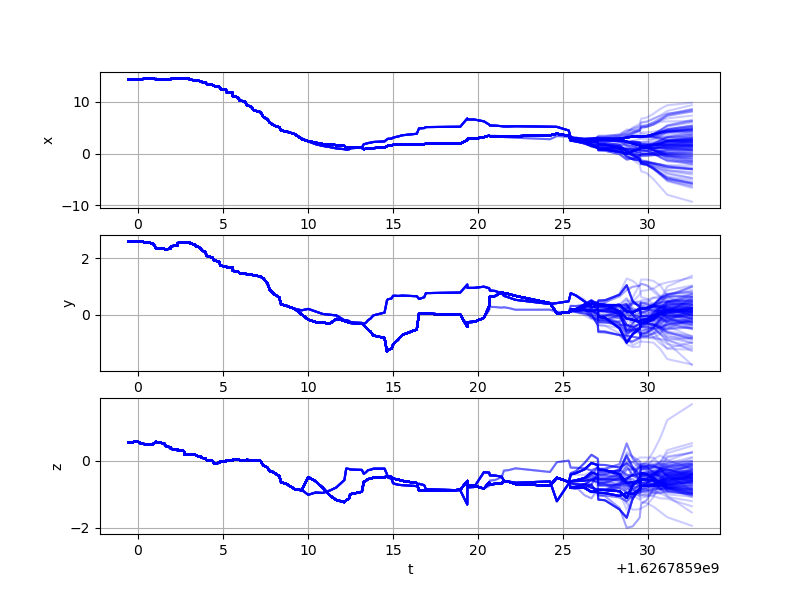

Text(0.5, 0, 't')

In [169]:
plt.figure(figsize=[8,6])
#plt.plot(t, x, 'r-',label='true')
#plt.plot(t[1:], y, 'kx',label='obs',markersize=10)
for plti in range(3):
    plt.subplot(3,1,plti+1)
    plt.plot(filter_t, svals[:-1, ::20, plti], '-b',alpha=0.2,markersize=2)
    #plt.plot(filter_t, wvals[:-1,:], '-b',alpha=0.2,markersize=2)
    #plt.legend()
    #plt.plot(x, x, 'r-')
    
    plt.ylabel(['x','y','z'][plti])
    #plt.plot(t,CI[0],'k--')
    #plt.plot(t,CI[1],'k--')
    #plt.xlim([filter_t[0],filter_t[50]])
    plt.grid()
    #plt.ylim([plotaround[plti]-2,plotaround[plti]+2])
plt.xlabel('t')

In [170]:
import numpy as np
import ipyvolume as ipv

#ipv.quickscatter(x, y, z, size=1, marker="sphere")


ipv.clear()
origins = []
pltobjs = []
steps = 100

plot_svals = svals[:,::100,:3]
particle_plot_points = np.zeros([steps,plot_svals.shape[1],3])
for i,t in enumerate(np.linspace(1626785900-2,1626785900+10,steps)):
    #keep = np.abs(filter_t-t)<20/steps)
    keep = []
    patch = 40/steps
    while len(keep)==0:
        keep = np.abs(filter_t-t)<patch
        patch*=1.5
        
    particle_plot_points[i,:,:] = np.mean((plot_svals[:-1,:,:][keep,:,:]),0)


for cam in [1,2,3,4]:
    starts = []
    ends = []    
    origin, vect = a.get_vector_pixel(a.newitems['cam%d' % cam],[0,0])
    origins.append(origin)
    
    for j,c in enumerate(coords['cam%d' % cam]):
        coord = c['xy']
        origin, vect = a.get_vector_pixel(a.newitems['cam%d' % cam],coord)        
        s = origin# + vect*10
        e = s+vect*24
        starts.append(s)
        ends.append(e)
        xs = np.full([steps,2],origin[0])
        ys = np.full([steps,2],origin[1])
        zs = np.full([steps,2],origin[2]) 
        for i,t in enumerate(np.linspace(1626785900-2,1626785900+10,steps)):            
            if np.abs(c['triggertime']-t)<40/steps:
                xs[i,:] = np.array([s[0],e[0]])
                ys[i,:] = np.array([s[1],e[1]])
                zs[i,:] = np.array([s[2],e[2]])
        col = (3+c['score'])/10 #get it positive
        if col>1: col=1
        if col<0: col=0
        pltobjs.append(ipv.plot(xs,ys,zs,color=[col,col,col]))
    
    
nxs = [a.newitems['nestfrontleft']['coords'][0],a.newitems['nestfrontright']['coords'][0]]
nys = [a.newitems['nestfrontleft']['coords'][1],a.newitems['nestfrontright']['coords'][1]]
nzs = [a.newitems['nestfrontleft']['coords'][2],a.newitems['nestfrontright']['coords'][2]]
ipv.scatter(nxs,nys,nzs)
pltobjs.append(ipv.scatter(particle_plot_points[:,:,0],particle_plot_points[:,:,1],particle_plot_points[:,:,2],size=1,marker='sphere'))

origins = np.array(origins)
ipv.scatter(origins[:,0],origins[:,1],origins[:,2])
#drawsvals  = svals[:,::100,:].reshape([126*5,3])
#ipv.scatter(drawsvals[:,0],drawsvals[:,1],drawsvals[:,2],marker='sphere',size=0.5,color='blue')
drawpath = np.mean(svals,axis=1)
ipv.plot(drawpath[:,0],drawpath[:,1],drawpath[:,2])
ipv.xlim(nxs[0]-3,nxs[0]+3)
ipv.ylim(nys[0]-3,nys[0]+3)
ipv.zlim(nzs[0]-3,nzs[0]+3)

ipv.animation_control(pltobjs)
ipv.show()

/home/mike/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mike/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


array([[13.05,  2.55,  0.41],
       [13.05,  2.55,  0.41],
       [13.05,  2.55,  0.41],
       ...,
       [12.52,  8.03,  0.29],
       [12.85,  6.47,  0.78],
       [15.49,  3.29,  1.3 ]])

In [ ]:
photo_list[9]['img']

In [ ]:
%matplotlib notebook
#plt.figure(figsize=[30,10])
plt.imshow(photo_list[6]['img'].astype(float))
plt.clim([0,100])

if contact is not None:
    for con in contact:
        if con['prediction']<2:
            plt.plot(con['x'],con['y'],'o',mew=3,markersize=50,alpha=0.3)

In [ ]:
origin, vect = a.get_vector_pixel(a.newitems['cam1'],)